# Span Batch Analysis - L2 Block Accumulation

Fetch consecutive singular batches. Singular batches will be stored at `./artifacts/mainnet/batches_v0_cache`, and each filename will be the form of `{l2blocknumber}.json`

For example, If we set `--start=107880000 --end=107881000`, 1000 json files will be generated, having filename from `107880000.json` to `107881000.json`.

In [ ]:
!./cmd/span_batch_tester/span_batch_tester fetch --l2 [L2_MAINNET_RPC] --start=107880000 --end=107881000 --concurrent-requests=100 --out=./artifacts/mainnet/batches_v0_cache

Merge singular batches.

In [ ]:
!./cmd/span_batch_tester/span_batch_tester merge --start=107880000 --end=107881000 --l2 [L2_MAINNET_RPC] --genesis-timestamp=1686068903 --in=./artifacts/mainnet/batches_v0_cache --out=./artifacts/mainnet/merge_result

Above command will analyze `start - end` number of batches, Comparing uncompressed size of below two batches:
- For `i` in range  `0` to `start - end - 1`
  - singular batch from number `start` to `start + i`, inclusive.
  - span batch from number `start` to `start + i`, inclusive.

Upper command will make a result json file which has name of the form `{start_number}_{end_number}.json`.

Relation between `L2BlockCount` and (`UncompressedSizeReductionPercent`, `BatchV1sMetadataSizePercent`).

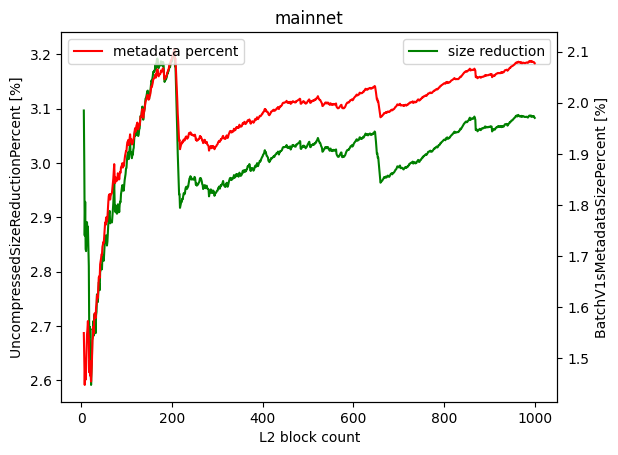

In [54]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 107880000
END_BLOCK_NUMBER = 107881000
CHAIN_NAME = "mainnet"
FILENAME = f"./artifacts/{CHAIN_NAME}/merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 5

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        uncompressed_reduction_precent = result[i]["UncompressedSizeReductionPercent"]
        Ys.append(uncompressed_reduction_precent)
        tx_size = result[i]["BatchV1sTxSize"]
        metadata_size = result[i]["BatchV1sMetadataSize"]
        metadata_percent = metadata_size / (metadata_size + tx_size) * 100
        Zs.append(metadata_percent)
        

fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, label="size reduction", c="green")
ax2 = ax1.twinx()
ax2.plot(Xs, Zs, label="metadata percent", c="red")
ax1.legend()
ax2.legend(loc="upper left")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("UncompressedSizeReductionPercent [%]")
ax2.set_ylabel("BatchV1sMetadataSizePercent [%]")



plt.title(CHAIN_NAME)

plt.show()


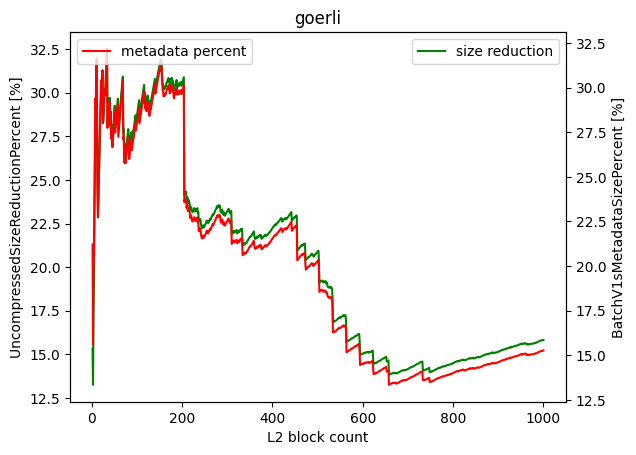

In [53]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "goerli"
FILENAME = f"./artifacts/{CHAIN_NAME}/merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
# CLAMP for better graph
CLAMP = 1

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        uncompressed_reduction_precent = result[i]["UncompressedSizeReductionPercent"]
        Ys.append(uncompressed_reduction_precent)
        tx_size = result[i]["BatchV1sTxSize"]
        metadata_size = result[i]["BatchV1sMetadataSize"]
        metadata_percent = metadata_size / (metadata_size + tx_size) * 100
        Zs.append(metadata_percent)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, label="size reduction", c="green")
ax2 = ax1.twinx()
ax2.plot(Xs, Zs, label="metadata percent", c="red")
ax1.legend()
ax2.legend(loc="upper left")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("UncompressedSizeReductionPercent [%]")
ax2.set_ylabel("BatchV1sMetadataSizePercent [%]")

plt.title(CHAIN_NAME)

plt.show()
